In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\purchase.csv")
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
df[['Gender']]= df[['Gender']].apply(LabelEncoder().fit_transform)
print(df)
X = df.iloc[:,[1,2,3]].values   #:all rows column last 1 delete
Y = df.iloc[:,-1].values

print(X)
print(Y)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]
[[    1    19 19000]
 [    1    35 20000]
 [    0    26 43000]
 ...
 [    0    50 20000]
 [    1    36 33000]
 [    0    49 36000]]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

print('Shape of X_train =',X_train.shape)
print('Shape of Y_train =',Y_train.shape)
print('Shape of X_train =',X_test.shape)
print('Shape of Y_train =',Y_test.shape)



Shape of X_train = (320, 3)
Shape of Y_train = (320,)
Shape of X_train = (80, 3)
Shape of Y_train = (80,)


In [6]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [7]:
#fitting SVM to the training set support vector classifier
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state=1)
classifier.fit(X_train,Y_train)

SVC(kernel='linear', random_state=1)

In [8]:
#Predicting the Test set results
Y_pred = classifier.predict(X_test)
print(Y_pred)
print(Y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [9]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[52  6]
 [ 3 19]]


<Axes: >

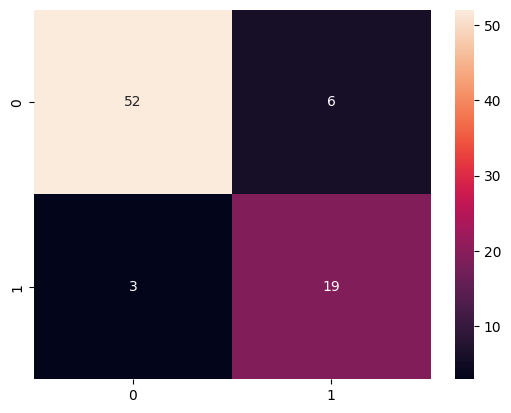

In [10]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [11]:


import sklearn.metrics
acc=sklearn.metrics.accuracy_score(Y_test,Y_pred)*100
print("Accuracy",acc)
pr=sklearn.metrics.precision_score(Y_test,Y_pred)*100
print("Precision",pr)
re=sklearn.metrics.recall_score(Y_test,Y_pred)*100
print("Recall",re)

Accuracy 88.75
Precision 76.0
Recall 86.36363636363636


In [12]:
#fitting SVM to the training set support vector classifier
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state=1)
classifier.fit(X_train,Y_train)

SVC(kernel='poly', random_state=1)

In [13]:
#Predicting the Test set results
Y_pred1 = classifier.predict(X_test)
print(Y_pred1)
print(Y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [14]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_test,Y_pred1)
print(cm1)

[[55  3]
 [ 2 20]]


<Axes: >

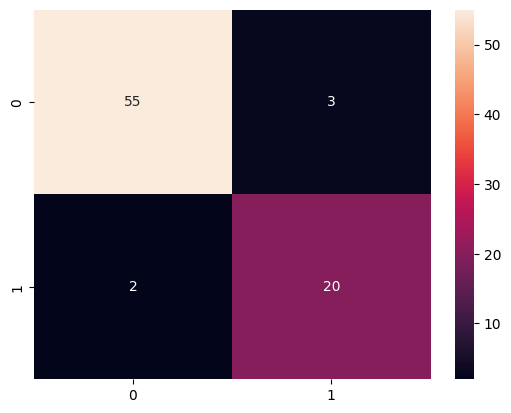

In [15]:
import seaborn as sns
sns.heatmap(cm1,annot=True)

In [16]:
import sklearn.metrics
acc1=sklearn.metrics.accuracy_score(Y_test,Y_pred1)*100
print("Accuracy",acc1)
pr1=sklearn.metrics.precision_score(Y_test,Y_pred1)*100
print("Precision",pr1)
re1=sklearn.metrics.recall_score(Y_test,Y_pred1)*100
print("Recall",re1)

Accuracy 93.75
Precision 86.95652173913044
Recall 90.9090909090909


In [17]:
#fitting SVM to the training set support vector classifier Radial Basiis Function
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state=1)
classifier.fit(X_train,Y_train)

SVC(random_state=1)

In [18]:
#Predicting the Test set results
Y_pred2 = classifier.predict(X_test)
print(Y_pred2)
print(Y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [19]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(Y_test,Y_pred2)
print(cm2)

[[55  3]
 [ 1 21]]


<Axes: >

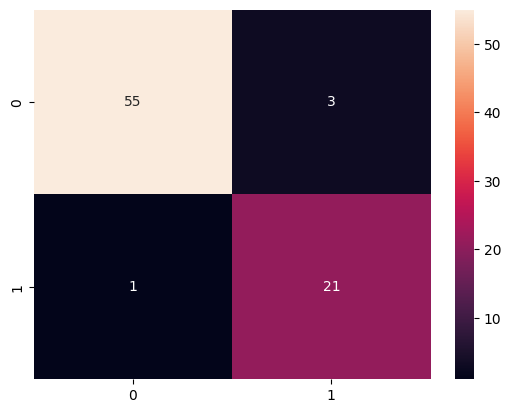

In [20]:
import seaborn as sns
sns.heatmap(cm2,annot=True)

In [21]:
import sklearn.metrics
acc2=sklearn.metrics.accuracy_score(Y_test,Y_pred2)*100
print("Accuracy",acc2)
pr2=sklearn.metrics.precision_score(Y_test,Y_pred2)*100
print("Precision",pr2)
re2=sklearn.metrics.recall_score(Y_test,Y_pred2)*100
print("Recall",re2)

Accuracy 95.0
Precision 87.5
Recall 95.45454545454545


In [22]:
#fitting SVM to the training set support vector classifier
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state=1)
classifier.fit(X_train,Y_train)

SVC(kernel='sigmoid', random_state=1)

In [23]:
#Predicting the Test set results
Y_pred3 = classifier.predict(X_test)
print(Y_pred3)
print(Y_test)

[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [24]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(Y_test,Y_pred3)
print(cm3)

[[53  5]
 [ 7 15]]


<Axes: >

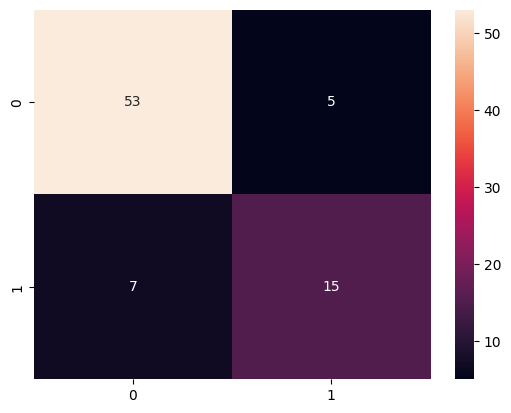

In [25]:
import seaborn as sns
sns.heatmap(cm3,annot=True)

In [26]:
import sklearn.metrics
acc3=sklearn.metrics.accuracy_score(Y_test,Y_pred3)*100
print("Accuracy",acc3)
pr3=sklearn.metrics.precision_score(Y_test,Y_pred3)*100
print("Precision",pr3)
re3=sklearn.metrics.recall_score(Y_test,Y_pred3)*100
print("Recall",re3)

Accuracy 85.0
Precision 75.0
Recall 68.18181818181817
